In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

!pip install requests pandas matplotlib seaborn

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import random
import matplotlib.font_manager as fm

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire



 예제 : 동물 정보 API - 고양이 사실 & 강아지 사진
 1단계: 고양이 사실 정보 수집
 고양이 사실 1: Cats, just like people, are subject to asthma. Dus...
 고양이 사실 2: Cats are subject to gum disease and to dental cari...
 고양이 사실 3: The most traveled cat is Hamlet, who escaped from ...
 고양이 사실 4: Ailurophile is the word cat lovers are officially ...
 고양이 사실 5: Cats have individual preferences for scratching su...
 고양이 사실 6: The group of words associated with cat (catt, cath...
 고양이 사실 7: Cats have 32 muscles that control the outer ear (h...
 고양이 사실 8: At 4 weeks, it is important to play with kittens s...
 고양이 사실 9: Polydactyl cats (a cat with 1-2 extra toes on thei...
 고양이 사실 10: A happy cat holds her tail high and steady....

 2단계: 강아지 품종 정보 수집
 107개의 강아지 품종 정보 수집
 Newfoundland 이미지 수집 완료
 Cattledog 이미지 수집 완료
 Pug 이미지 수집 완료
 Otterhound 이미지 수집 완료
 Hound 이미지 수집 완료
 Danish 이미지 수집 완료
 Chow 이미지 수집 완료
 Shihtzu 이미지 수집 완료
 Pinscher 이미지 수집 완료
 Sharpei 이미지 수집 완료

 3단계: 동물 데이터 분석


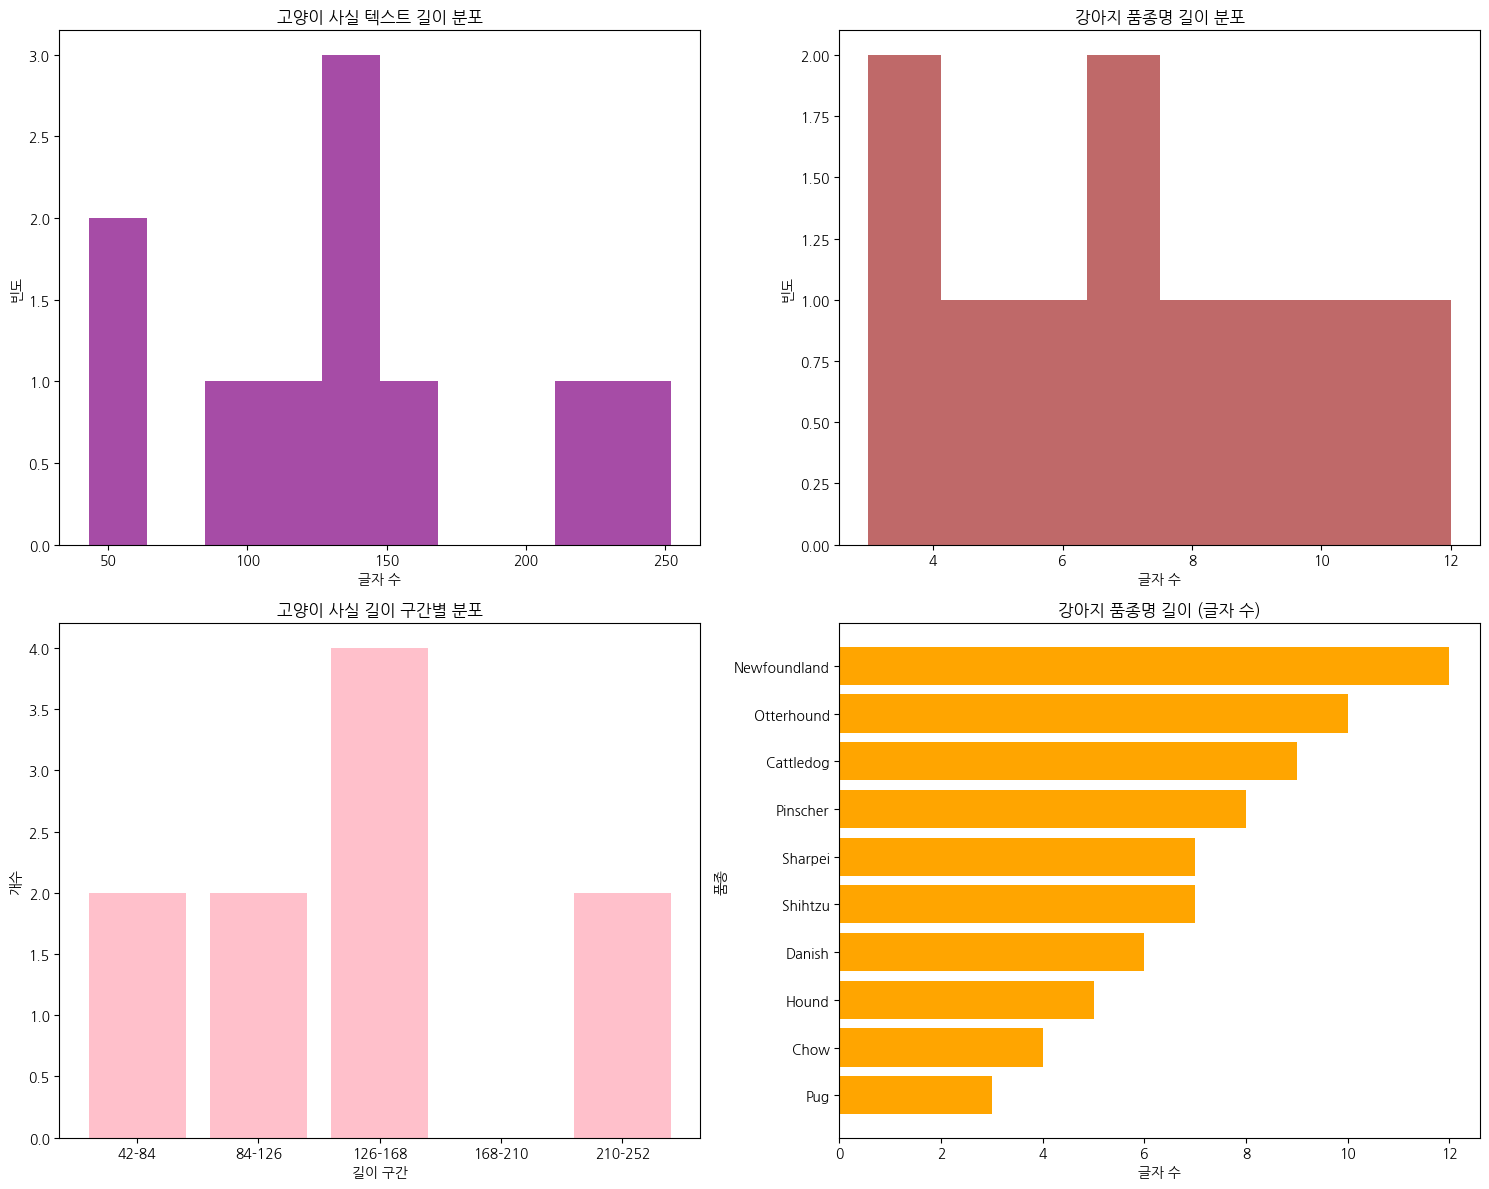


 동물 정보 분석 결과:
 고양이 사실 평균 길이: 137.1글자
 가장 긴 고양이 사실: 252글자
 가장 짧은 고양이 사실: 43글자
 강아지 품종 수: 10개
 가장 긴 품종명: Newfoundland
 가장 짧은 품종명: Pug

 오늘의 고양이 사실:
'Cats have 32 muscles that control the outer ear (humans have only 6). A cat can independently rotate its ears 180 degrees.'


In [2]:
print("\n\n 예제 : 동물 정보 API - 고양이 사실 & 강아지 사진")
print("=" * 60)

def example_2_animal_facts():
    """
    동물 관련 무료 API 활용 예제
    - 고양이 사실 정보 수집
    - 강아지 품종 정보 수집
    - 텍스트 데이터 분석
    """

    print(" 1단계: 고양이 사실 정보 수집")

    cat_facts = []

    # 여러 개의 고양이 사실 수집
    for i in range(10):
        try:
            response = requests.get("https://catfact.ninja/fact")
            if response.status_code == 200:
                fact_data = response.json()
                cat_facts.append({
                    'fact': fact_data['fact'],
                    'length': fact_data['length'],
                    'id': i + 1
                })
                print(f" 고양이 사실 {i+1}: {fact_data['fact'][:50]}...")
            time.sleep(0.2)  # API 부하 방지
        except Exception as e:
            print(f" 오류 발생: {e}")

    cat_facts_df = pd.DataFrame(cat_facts)

    print(f"\n 2단계: 강아지 품종 정보 수집")

    # 강아지 품종 목록 가져오기
    breeds_response = requests.get("https://dog.ceo/api/breeds/list/all")
    breeds_data = breeds_response.json()

    if breeds_data['status'] == 'success':
        breeds = list(breeds_data['message'].keys())
        print(f" {len(breeds)}개의 강아지 품종 정보 수집")

        # 랜덤 품종들의 이미지 URL 수집
        dog_images = []
        sample_breeds = random.sample(breeds, min(10, len(breeds)))

        for breed in sample_breeds:
            try:
                image_response = requests.get(f"https://dog.ceo/api/breed/{breed}/images/random")
                if image_response.status_code == 200:
                    image_data = image_response.json()
                    if image_data['status'] == 'success':
                        dog_images.append({
                            'breed': breed,
                            'image_url': image_data['message'],
                            'breed_length': len(breed)
                        })
                        print(f" {breed.title()} 이미지 수집 완료")
                time.sleep(0.2)
            except Exception as e:
                print(f" {breed} 오류: {e}")

    dog_images_df = pd.DataFrame(dog_images)

    print(f"\n 3단계: 동물 데이터 분석")

    # 시각화
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. 고양이 사실 길이 분포
    axes[0, 0].hist(cat_facts_df['length'], bins=10, color='purple', alpha=0.7)
    axes[0, 0].set_title('고양이 사실 텍스트 길이 분포')
    axes[0, 0].set_xlabel('글자 수')
    axes[0, 0].set_ylabel('빈도')

    # 2. 강아지 품종명 길이 분포
    if not dog_images_df.empty:
        axes[0, 1].hist(dog_images_df['breed_length'], bins=8, color='brown', alpha=0.7)
        axes[0, 1].set_title('강아지 품종명 길이 분포')
        axes[0, 1].set_xlabel('글자 수')
        axes[0, 1].set_ylabel('빈도')

    # 3. 고양이 사실 길이별 빈도
    length_ranges = pd.cut(cat_facts_df['length'], bins=5)
    length_counts = length_ranges.value_counts().sort_index()
    axes[1, 0].bar(range(len(length_counts)), length_counts.values, color='pink')
    axes[1, 0].set_title('고양이 사실 길이 구간별 분포')
    axes[1, 0].set_xlabel('길이 구간')
    axes[1, 0].set_ylabel('개수')
    axes[1, 0].set_xticks(range(len(length_counts)))
    axes[1, 0].set_xticklabels([f"{int(interval.left)}-{int(interval.right)}" for interval in length_counts.index])

    # 4. 강아지 품종별 이름 길이
    if not dog_images_df.empty:
        sorted_breeds = dog_images_df.sort_values('breed_length')
        axes[1, 1].barh(range(len(sorted_breeds)), sorted_breeds['breed_length'], color='orange')
        axes[1, 1].set_title('강아지 품종명 길이 (글자 수)')
        axes[1, 1].set_xlabel('글자 수')
        axes[1, 1].set_ylabel('품종')
        axes[1, 1].set_yticks(range(len(sorted_breeds)))
        axes[1, 1].set_yticklabels(sorted_breeds['breed'].str.title())

    plt.tight_layout()
    plt.show()

    print(f"\n 동물 정보 분석 결과:")
    print(f" 고양이 사실 평균 길이: {cat_facts_df['length'].mean():.1f}글자")
    print(f" 가장 긴 고양이 사실: {cat_facts_df['length'].max()}글자")
    print(f" 가장 짧은 고양이 사실: {cat_facts_df['length'].min()}글자")

    if not dog_images_df.empty:
        print(f" 강아지 품종 수: {len(dog_images_df)}개")
        print(f" 가장 긴 품종명: {dog_images_df.loc[dog_images_df['breed_length'].idxmax(), 'breed'].title()}")
        print(f" 가장 짧은 품종명: {dog_images_df.loc[dog_images_df['breed_length'].idxmin(), 'breed'].title()}")

    # 재미있는 고양이 사실 출력
    print(f"\n 오늘의 고양이 사실:")
    random_fact = random.choice(cat_facts)
    print(f"'{random_fact['fact']}'")

    return cat_facts_df, dog_images_df

# 예제  실행
cat_facts_df, dog_images_df = example_2_animal_facts()